In [1]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np
import sklearn

# для встроенных картинок
%pylab inline
# %matplotlib inline
# чуть покрасивше картинки:
pd.set_option('display.mpl_style', 'default')
figsize(10, 3)

Populating the interactive namespace from numpy and matplotlib


In [9]:
datatrain = pd.read_csv('C:\\notebooks\\train.csv')
datatest = pd.read_csv('C:\\notebooks\\test.csv')
datastore = pd.read_csv('C:\\notebooks\\store.csv')

In [46]:
import time
t = time.time()

datatrain['StateHoliday'] = datatrain['StateHoliday'].astype(str) # сразу

#from datetime import datetime
#
#def add_date(df, date_column):
#    df[date_column] = pd.to_datetime(df[date_column])
#    df['Year'] = df[date_column].dt.year
#    df['Month'] = df[date_column].dt.month
#    #df['dayofweek'] = df[date_column].dt.dayofweek
#    df['Day'] = df[date_column].dt.day
#    
#add_date(datatrain, 'Date')
#add_date(datatest, 'Date')    

datatrain.Date = pd.to_datetime(datatrain.Date)
datatest.Date = pd.to_datetime(datatest.Date)
datatrain['Day'] = datatrain.Date.map(lambda x: x.day) # ИНАЧЕ НЕ ПРИСВАИВАЕТСЯ
datatrain['Month'] = datatrain.Date.map(lambda x: x.month) # ИНАЧЕ НЕ ПРИСВАИВАЕТСЯ
datatrain['DayOfYear'] = datatrain.Date.map(lambda x: x.dayofyear)
datatrain['Year'] = datatrain.Date.map(lambda x: x.year)
datatrain['Week'] = datatrain.Date.map(lambda x: x.week)
datatest['Month'] = datatest.Date.map(lambda x: x.month)
datatest['DayOfYear'] = datatest.Date.map(lambda x: x.dayofyear)
datatest['Year'] = datatest.Date.map(lambda x: x.year)
datatest['Week'] = datatest.Date.map(lambda x: x.week)

elapsed = time.time() - t
print 'elapsed = ' + str(elapsed)

elapsed = 26.6640000343


In [47]:
datatrain.Day.unique()

array([31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [12]:
# ошибка
def rmspe(y, a):
    # y=0 - игнорировать
    return np.mean((((y-a)/y)[y>0]) ** 2) ** 0.5

# ошибка
def prmse(y, a):
    # y=0 - игнорировать
    return (np.mean(((y-a)[y>0]) ** 2) ** 0.5)/np.mean(y[y>0])

# ошибка
def smape(y, a):
    # y=0 - игнорировать
    return np.mean((2*np.abs(y-a)/np.abs(y+a))[y>0])

In [13]:
test = datatrain[datatrain.Date>pd.Timestamp('2015-06-13 00:00:00')]
train = datatrain[datatrain.Date<=pd.Timestamp('2015-06-13 00:00:00')]
print train.shape, test.shape

ytrain = train.Sales.values
ytest = test.Sales.values

(963689, 13) (53520, 13)


In [14]:
train[:3]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,DayOfYear,Year,Week
53520,1,6,2015-06-13,4256,502,1,0,0,0,6,164,2015,24
53521,2,6,2015-06-13,2574,319,1,0,0,0,6,164,2015,24
53522,3,6,2015-06-13,4687,492,1,0,0,0,6,164,2015,24


In [5]:
def makex(x):
    days = pd.get_dummies(x['DayOfWeek'])
    days.columns = ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7']
    months = pd.get_dummies(x['Month'])
    months.columns = ['Month'+str(i+1) for i in range(12)]
    store = pd.get_dummies(x['Store'])
    store.columns = ['Store'+str(i+1) for i in range(store.shape[1])]
    # , x.DayOfYear
    newtrain = pd.concat([x.Sales, x.intest, x.Promo, x.SchoolHoliday, x.StateHoliday!='0', store, days, months],axis=1)
    return(newtrain)

In [32]:
x = makex(datatrain[datatrain.Year==2013])
print x.shape

(406974, 1138)


In [33]:
from sklearn.linear_model import Ridge
clf  = Ridge(alpha=1.0, fit_intercept=True, normalize=True, copy_X=True, max_iter=None, tol=0.001, solver='auto')
clf.fit(x[x.columns - ['Sales']], x['Sales'].values)
a = clf.predict(x[x.columns - ['Sales']])
y = x['Sales'].values

In [15]:
def tmprmspe(y, a):
    # y=0 - игнорировать
    i = y>0
    return np.mean((((y[i]-a[i])/y[i])) ** 2) ** 0.5

# tmprmspe(y, a)

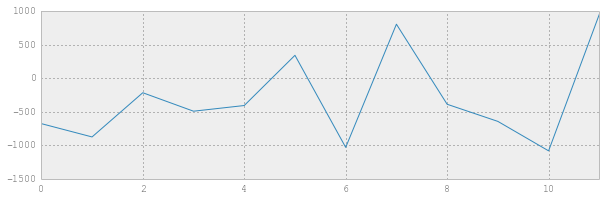

In [42]:
pd.Series(clf.coef_[-12:]).plot()

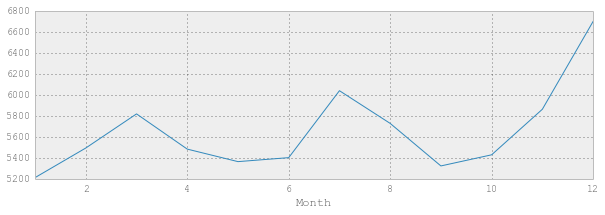

In [34]:
train[train.Year==2013].groupby('Month')['Sales'].mean().plot()

In [55]:
x[:10]

,Sales,intest,Promo,SchoolHoliday,StateHoliday,Store1,Day1,Day2,Day3,Day4,...,Month3,Month4,Month5,Month6,Month7,Month8,Month9,Month10,Month11,Month12
1114,8680,True,1,1,False,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2229,8405,True,1,1,False,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3344,7661,True,1,1,False,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4459,8093,True,1,1,False,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5574,10712,True,1,1,False,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6689,0,True,0,0,False,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7804,6897,True,0,0,False,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8919,5816,True,0,0,False,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10034,6150,True,0,0,False,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
11149,5342,True,0,0,False,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


# Старое доброе усредненеие

In [57]:
# старая версия
st = train.groupby(['Store', 'DayOfWeek'])['Sales'].mean() # [train.Year==2013]
a = train[['Store', 'DayOfWeek']].apply(lambda x: st[x[0], x[1]], axis=1).values
y = train['Sales'].values
tmprmspe(y, a)

0.28780270726422391

In [21]:
# быстрый способ

def runmeaning(train, test, fts = ['Store', 'DayOfWeek', 'Promo']):
    st = train.groupby(fts)['Sales'].mean() # [train.Year==2013]
    st = st.reset_index()

    train['ind'] = train.index
    atrain = pd.merge(train, st, on=fts, how='left')
    atrain.sort('ind', inplace=True)
    atrain = atrain.Sales_y
    
    print 'обучение: ' + str(train.shape[0]) + ' контроль: ' + str(test.shape[0])
    
    print 'не срослось = ' + str(atrain.isnull().sum())
    atrain = atrain.fillna(atrain.mean()).values
    print 'Качество (обучение) = ' + str(rmspe(train['Sales'].values, atrain)) + ' / ' + str(tmprmspe(train['Sales'].values, atrain))

    test['ind'] = test.index
    atest = pd.merge(test, st, on=fts, how='left')
    atest.sort('ind', inplace=True)
    atest = atest.Sales_y
    print 'не срослось = ' + str(atest.isnull().sum())
    atest = atest.fillna(atest.mean()).values
    print 'Качество (контроль) = ' + str(rmspe(test['Sales'].values, atest)) + ' / ' + str(tmprmspe(test['Sales'].values, atest))
    print '--------------'
    return (atrain, atest)

In [17]:
print (datatrain.Date[datatrain.Date>pd.Timestamp('2015-06-13 00:00:00')].nunique())
print (datatrain.Date[datatrain.Date>pd.Timestamp('2015-04-26 00:00:00')].nunique())
print (datatrain.Date[datatrain.Date>pd.Timestamp('2015-03-09 00:00:00')].nunique())

48
96
144


In [18]:
datatrain['Holiday'] = datatrain['StateHoliday']!='0'

fts = ['DayOfWeek', 'Store', 'Open', 'Promo', 'Holiday', 'SchoolHoliday']

test = datatrain[datatrain.Date>pd.Timestamp('2015-06-13 00:00:00')]
train = datatrain[datatrain.Date<=pd.Timestamp('2015-06-13 00:00:00')]
runmeaning(train, test, fts)

test = datatrain[(pd.Timestamp('2015-06-13 00:00:00')>=datatrain.Date) & (datatrain.Date>pd.Timestamp('2015-04-26 00:00:00'))]
train = datatrain[datatrain.Date<=pd.Timestamp('2015-04-26 00:00:00')]
runmeaning(train, test, fts)

test = datatrain[(pd.Timestamp('2015-04-26 00:00:00')>=datatrain.Date) & (datatrain.Date>pd.Timestamp('2015-03-09 00:00:00'))]
train = datatrain[datatrain.Date<=pd.Timestamp('2015-03-09 00:00:00')]
runmeaning(train, test, fts)

обучение: 963689 контроль: 53520
не срослось = 0
Качество (обучение) = 0.228857981538 / 0.228857981538

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



не срослось = 55
Качество (контроль) = 0.146727216348 / 0.146727216348
--------------
обучение: 910169 контроль: 53520
не срослось = 0
Качество (обучение) = 0.231012889352 / 0.231012889352
не срослось = 222
Качество (контроль) = 0.149843924304 / 0.149843924304
--------------
обучение: 856649 контроль: 53520
не срослось = 0
Качество (обучение) = 0.234044112253 / 0.234044112253
не срослось = 10
Качество (контроль) = 0.147773747628 / 0.147773747628
--------------


In [49]:
datatrain['Holiday'] = datatrain['StateHoliday']!='0'

datatrain['be'] = (datatrain['Day']<5)|(datatrain['Day']>26)

fts = ['DayOfWeek', 'Store', 'Open', 'Promo', 'Holiday', 'SchoolHoliday','be']


test = datatrain[datatrain.Date>pd.Timestamp('2015-06-13 00:00:00')]
train = datatrain[datatrain.Date<=pd.Timestamp('2015-06-13 00:00:00')]
runmeaning(train, test, fts)

test = datatrain[(pd.Timestamp('2015-06-13 00:00:00')>=datatrain.Date) & (datatrain.Date>pd.Timestamp('2015-04-26 00:00:00'))]
train = datatrain[datatrain.Date<=pd.Timestamp('2015-04-26 00:00:00')]
runmeaning(train, test, fts)

test = datatrain[(pd.Timestamp('2015-04-26 00:00:00')>=datatrain.Date) & (datatrain.Date>pd.Timestamp('2015-03-09 00:00:00'))]
train = datatrain[datatrain.Date<=pd.Timestamp('2015-03-09 00:00:00')]
runmeaning(train, test, fts)

# test = datatrain[datatrain.Date>pd.Timestamp('2015-06-13 00:00:00')]
# train = datatrain[datatrain.Date<=pd.Timestamp('2015-06-13 00:00:00')]
# (atrain, atest) = runmeaning(train, test, fts)

обучение: 963689 контроль: 53520
не срослось = 0
Качество (обучение) = 0.22118929841 / 0.22118929841

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



не срослось = 55
Качество (контроль) = 0.151066946197 / 0.151066946197
--------------
обучение: 910169 контроль: 53520
не срослось = 0
Качество (обучение) = 0.223367271052 / 0.223367271052
не срослось = 225
Качество (контроль) = 0.143242211357 / 0.143242211357
--------------
обучение: 856649 контроль: 53520
не срослось = 0
Качество (обучение) = 0.22643045827 / 0.22643045827
не срослось = 16
Качество (контроль) = 0.141517246319 / 0.141517246319
--------------


(array([ 4055.21212121,  4042.53125   ,  5415.3125    , ...,     0.        ,
            0.        ,     0.        ]),
 array([     0.        ,      0.        ,      0.        , ...,
          5712.15625   ,  17812.63636364,   4340.45454545]))

In [27]:
train['Predict'] = atrain
train['Delta'] = train.Sales - train.Predict

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [26]:
print train[:3]

       Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
53520      1          6 2015-06-13   4256        502     1      0   
53521      2          6 2015-06-13   2574        319     1      0   
53522      3          6 2015-06-13   4687        492     1      0   

      StateHoliday  SchoolHoliday  Month  DayOfYear  Year  Week Holiday  \
53520            0              0      6        164  2015    24   False   
53521            0              0      6        164  2015    24   False   
53522            0              0      6        164  2015    24   False   

         ind      Predict  
53520  53520  5039.629630  
53521  53521  2863.210938  
53522  53522  4476.897638  


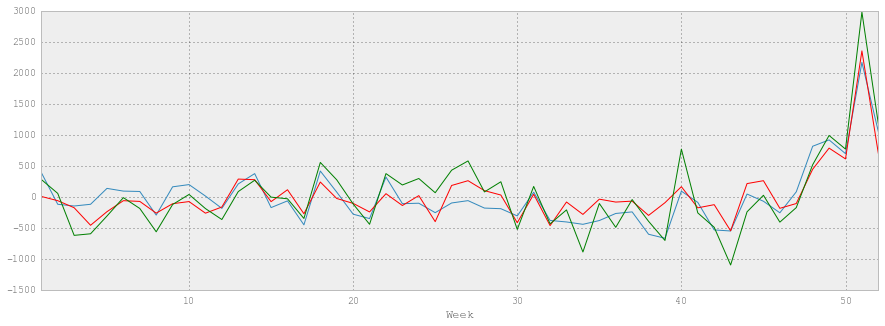

In [44]:
figsize(15, 5)
train[train.Store==1].groupby('Week').Delta.mean().plot()
train[train.Store==2].groupby('Week').Delta.mean().plot(color='r')
train[train.Store==3].groupby('Week').Delta.mean().plot(color='g')

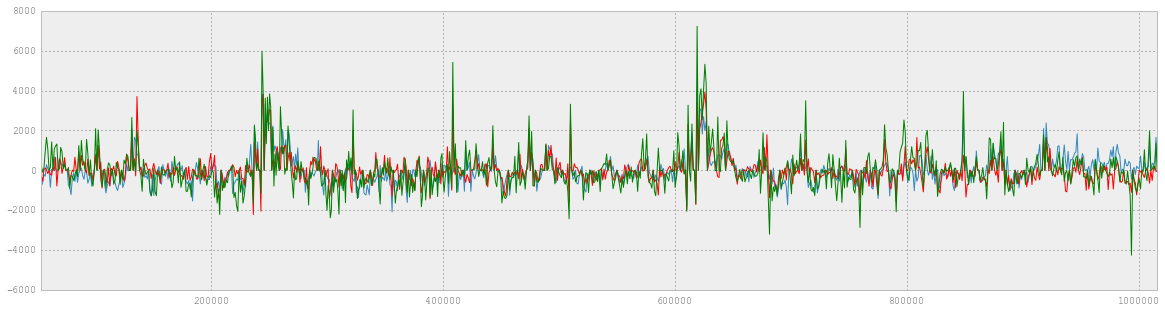

In [45]:
figsize(20, 5)
train[train.Store==1].Delta.plot()
train[train.Store==2].Delta.plot(color='r')
train[train.Store==3].Delta.plot(color='g')

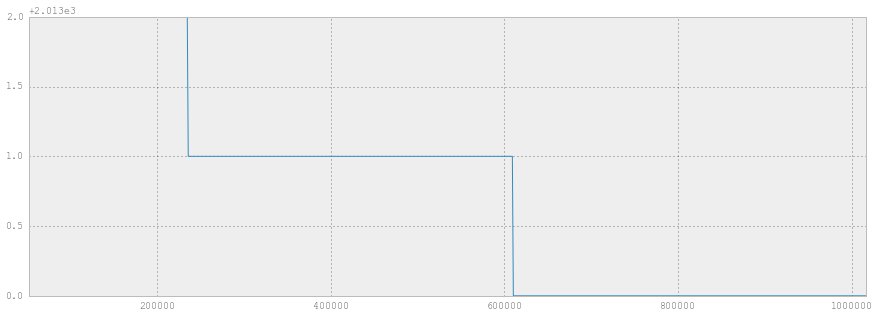

In [43]:
train[train.Store==1].Year.plot()

# Отдельно по магазинам


In [73]:
def makex(x):
    days = pd.get_dummies(x['DayOfWeek'])
    days.columns = ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7']
    months = pd.get_dummies(x['Month'])
    months.columns = ['Month'+str(i+1) for i in range(12)]
    #store = pd.get_dummies(x['Store'])
    #store.columns = ['Store'+str(i+1) for i in range(store.shape[1])]
    # , x.DayOfYear store, 
    newtrain = pd.concat([x.Sales, x.intrain, x.Open, x.Promo, x.SchoolHoliday, x.StateHoliday!='0', days, months],axis=1)
    return(newtrain)

In [88]:
from sklearn.linear_model import Ridge

def runlin(train, test, clf  = Ridge(alpha=0.1, normalize=True)):
     # , fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto'
    
    train['intrain'] = True
    test['intrain'] = False
    
    data = pd.concat([train, test])
    
    test['Predict'] = 0.0

    for s in test.Store.unique():
        x = makex(data[data.Store==s])
        i = (x.intrain) & (x.Sales>0)
        clf.fit(x[i][x.columns - ['intrain', 'Sales']], np.log(x[i]['Sales'].values+1))
        a = clf.predict(x[~x.intrain][x.columns - ['intrain', 'Sales']])
        test.ix[test.Store==s, 'Predict'] = np.exp(a.astype(float)-1.0) # [test.Store==s]['Predict']
    test.ix[test.Open==0, 'Predict'] = 0
    
    return test['Predict'].values

In [89]:
test = datatrain[datatrain.Date>pd.Timestamp('2015-06-13 00:00:00')]
train = datatrain[datatrain.Date<=pd.Timestamp('2015-06-13 00:00:00')]
a = runlin(train, test, Ridge(alpha=0.001, normalize=True))

In [84]:
for l in np.linspace(1.0, 0.9, 11):
    print rmspe(test['Sales'].values, l*a)

0.1559588234
0.155006292858
0.154705647611
0.155060679503
0.156066913858
0.157711886751
0.159975895658
0.162833121658
0.166252982451
0.170201566347
0.174643014599


In [87]:
# Обучаться на Sales>0 хуже !!!! 15.47 - 15.95
for l in np.linspace(1.0, 0.9, 11):
    print rmspe(test['Sales'].values, l*a)

0.16080593416
0.159870923867
0.159567320226
0.159898719879
0.160861198253
0.162443538303
0.164627867382
0.167390620556
0.170703715632
0.174535815121
0.178853561716


In [78]:
models = [Ridge(alpha=p, normalize=True) for p in [0.001, 0.01, 0.1]]

for clf in models:
    print rmspe(test['Sales'].values, runlin(train, test, clf))

0.155692621418
0.155850919747
0.158423779291


In [13]:
test.ix[test.Open==0, 'Predict'] = 0
test[:3]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,DayOfYear,Year,Week,intest,Predict
0,1,5,2015-07-31,5263,555,1,1,0,1,7,212,2015,31,True,4982.263793
1,2,5,2015-07-31,6064,625,1,1,0,1,7,212,2015,31,True,5401.421389
2,3,5,2015-07-31,8314,821,1,1,0,1,7,212,2015,31,True,8027.416897


In [14]:
tmprmspe(test['Sales'],test['Predict'])

0.20018680268644373

In [54]:
tmprmspe(test['Sales'].values,test['Predict'].values)

0.156428471466658

In [46]:
#test[['Sales', 'Predict']].plot(kind='scatter', x='Sales', y='Predict')

# метод Антона

In [48]:
def poly(i, alpha, k):
    return (i + 1) ** (-alpha)

def weighted_mean(x, k, alpha, w_func):
    k = min(k, len(x))
    sales = x[:k]
    weights = [w_func(i, alpha, k) for i in xrange(0, k)]
    return np.dot(sales[:k], weights) / float(sum(weights))

def tuple_aggr(x, drop_zero=False):
    if drop_zero:
        return tuple([i for i in list(x) if i != 0])
    else:
        return tuple(x)
    

In [53]:
def runanton(train, test, group = ['Store', 'DayOfWeek', 'Promo', 'Open', 'StateHoliday']):
    grouped = train.groupby(group)['Sales']
    sales_tuples = grouped.aggregate(lambda x: tuple_aggr(x, drop_zero=True))
    # константное решение
    magic_const = np.mean(train.Sales) * 0.862

    means = sales_tuples.map(lambda x: weighted_mean(x, k=116, alpha=0.95, w_func=poly))
    means = means.reset_index()

    test.Open.fillna(1, inplace=True)
    
    test['ind'] = test.index
    atest = pd.merge(test, means, on=group, how='left')
    atest.sort('ind', inplace=True)
    atest = atest.Sales_y # *0.961
    print 'не срослось = ' + str(atest.isnull().sum())
    atest = atest.fillna(magic_const).values
    
    #answers.Sales = answers.Sales.map(round)
    #answers.Sales *= 0.961
    
    print 'Качество (контроль) = ' + str(rmspe(test['Sales'].values, atest)) + ' / ' + str(tmprmspe(test['Sales'].values, atest))
    print '--------------'
    return (atest)

In [54]:
test = datatrain[datatrain.Date>pd.Timestamp('2015-06-13 00:00:00')]
train = datatrain[datatrain.Date<=pd.Timestamp('2015-06-13 00:00:00')]
b = runanton(train, test)

test = datatrain[(pd.Timestamp('2015-06-13 00:00:00')>=datatrain.Date) & (datatrain.Date>pd.Timestamp('2015-04-26 00:00:00'))]
train = datatrain[datatrain.Date<=pd.Timestamp('2015-04-26 00:00:00')]
runanton(train, test)

test = datatrain[(pd.Timestamp('2015-04-26 00:00:00')>=datatrain.Date) & (datatrain.Date>pd.Timestamp('2015-03-09 00:00:00'))]
train = datatrain[datatrain.Date<=pd.Timestamp('2015-03-09 00:00:00')]
runanton(train, test)

не срослось = 7636
Качество (контроль) = 0.134524126828 / 0.134524126828
--------------
не срослось = 10461
Качество (контроль) = 0.134841557668 / 0.134841557668
--------------
не срослось = 9798
Качество (контроль) = 0.139262152838 / 0.139262152838
--------------
